In [1]:
library(Seurat)
library(Signac)
library(zellkonverter)

Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built under R 4.3.2 but the current version is
4.3.3; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Registered S3 method overwritten by 'zellkonverter':
  method                                             from      
  py_to_r.pandas.core.arrays.categorical.Categorical reticulate



Import data
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE194122

In [2]:
obj.sce <- readH5AD("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/raw/10x_multiome_240430/GSE194122_openproblems_neurips2021_multiome_BMMC_processed.h5ad")
obj.sce

+ /maps/projects/ralab/people/lpm537/home/.cache/R/basilisk/1.14.3/0/bin/conda create --yes --prefix /maps/projects/ralab/people/lpm537/home/.cache/R/basilisk/1.14.3/zellkonverter/1.12.1/zellkonverterAnnDataEnv-0.10.2 'python=3.11.5' --quiet -c conda-forge

+ /maps/projects/ralab/people/lpm537/home/.cache/R/basilisk/1.14.3/0/bin/conda install --yes --prefix /maps/projects/ralab/people/lpm537/home/.cache/R/basilisk/1.14.3/zellkonverter/1.12.1/zellkonverterAnnDataEnv-0.10.2 'python=3.11.5' -c conda-forge

+ /maps/projects/ralab/people/lpm537/home/.cache/R/basilisk/1.14.3/0/bin/conda install --yes --prefix /maps/projects/ralab/people/lpm537/home/.cache/R/basilisk/1.14.3/zellkonverter/1.12.1/zellkonverterAnnDataEnv-0.10.2 -c conda-forge 'python=3.11.5' 'anndata=0.10.2' 'h5py=3.10.0' 'hdf5=1.14.2' 'natsort=8.4.0' 'numpy=1.26.0' 'packaging=23.2' 'pandas=2.1.1' 'python=3.11.5' 'scipy=1.11.3'

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 9.8 GiB”


class: SingleCellExperiment 
dim: 129921 69249 
metadata(4): ATAC_gene_activity_var_names dataset_id genome organism
assays(2): X counts
rownames(129921): AL627309.5 LINC01409 ... KI270713.1-21434-22336
  KI270713.1-29629-30491
rowData names(2): feature_types gene_id
colnames(69249): TAGTTGTCACCCTCAC-1-s1d1 CTATGGCCATAACGGG-1-s1d1 ...
  ACACTTGCAACTAGAA-12-s4d9 CACTTAAAGTCTGGGC-12-s4d9
colData names(28): GEX_pct_counts_mt GEX_n_counts ... QCMeds
  DonorSmoker
reducedDimNames(6): ATAC_gene_activity ATAC_lsi_full ... GEX_X_pca
  GEX_X_umap
mainExpName: NULL
altExpNames(0):

Check data quality

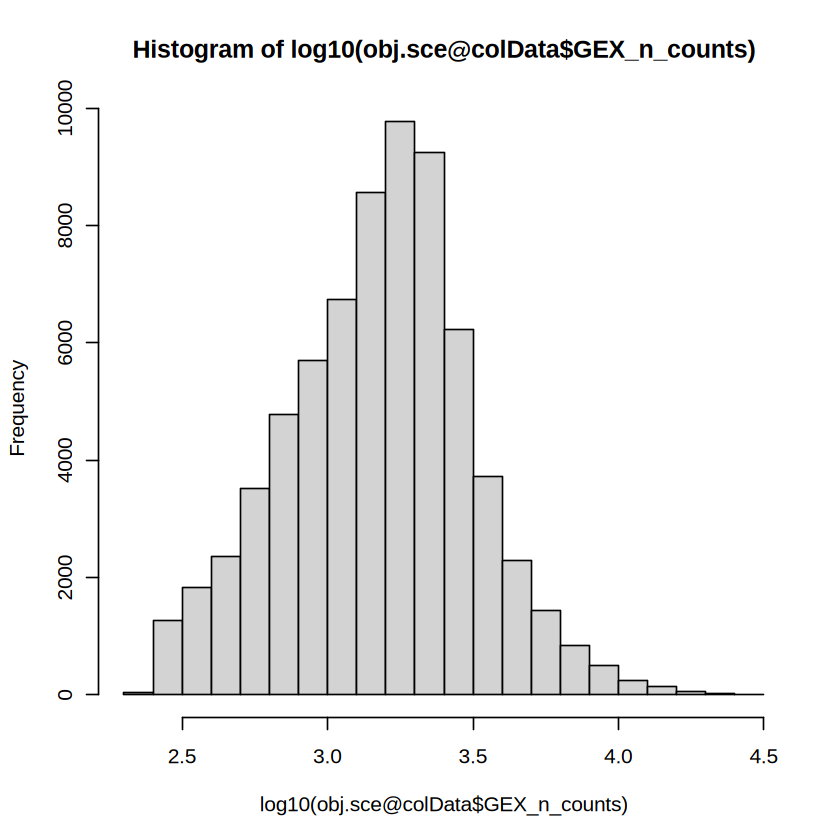

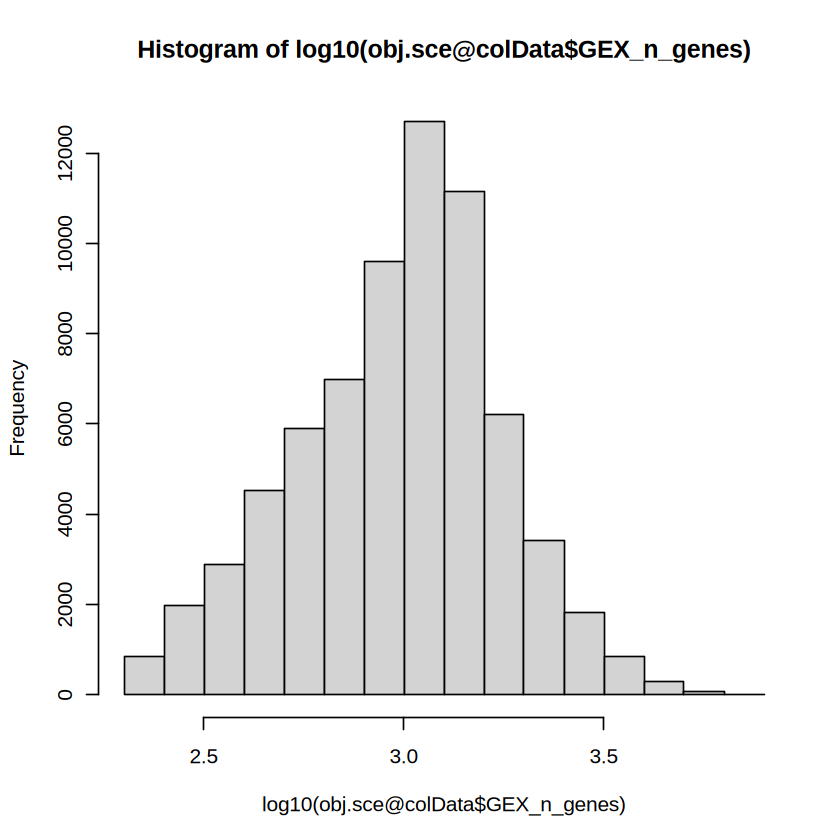

In [5]:
hist(log10(obj.sce@colData$GEX_n_counts))
hist(log10(obj.sce@colData$GEX_n_genes))

In [6]:
mean((obj.sce@colData$GEX_n_counts))
median((obj.sce@colData$GEX_n_counts))
mean((obj.sce@colData$GEX_n_genes))
median((obj.sce@colData$GEX_n_genes))

[1] 1957.822

[1] 1580

[1] 1140.055

[1] 1038

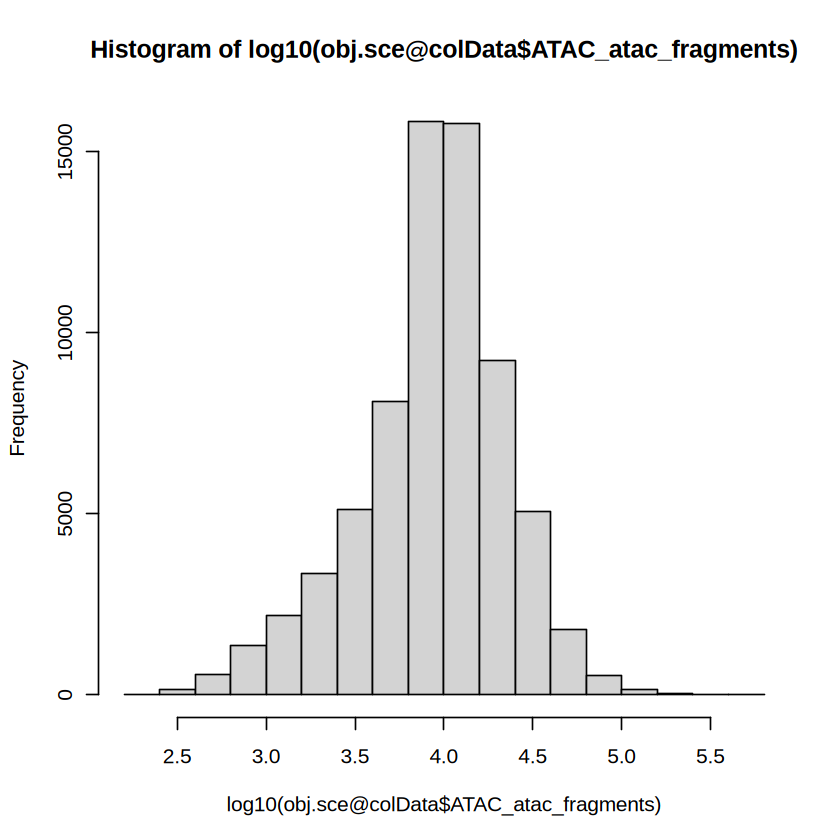

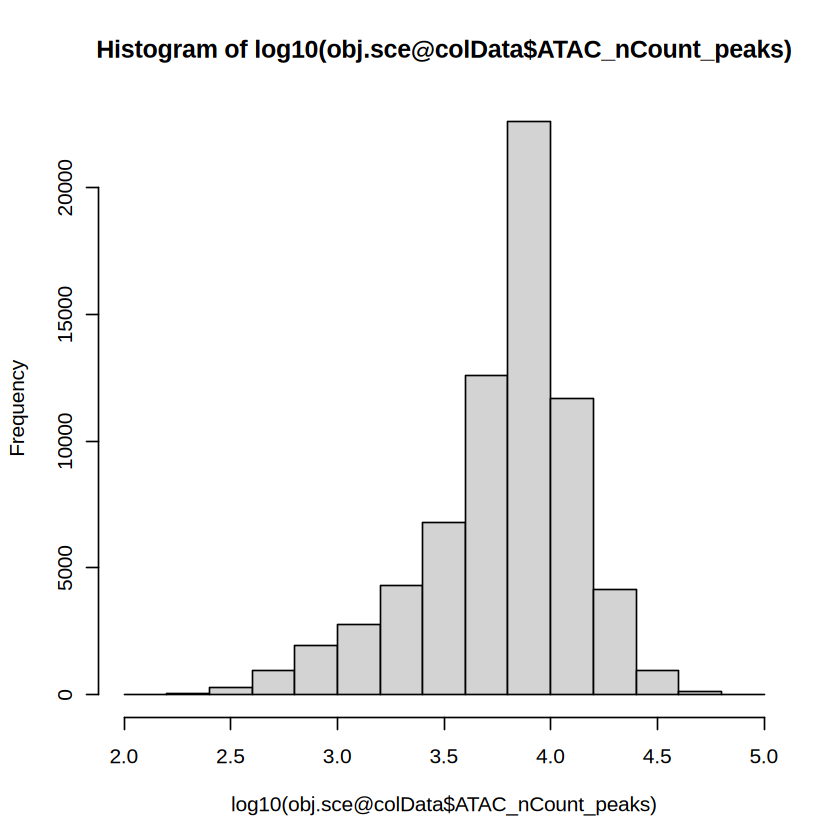

In [7]:
hist(log10(obj.sce@colData$ATAC_atac_fragments))
hist(log10(obj.sce@colData$ATAC_nCount_peaks))

In [8]:
mean((obj.sce@colData$ATAC_atac_fragments))
median((obj.sce@colData$ATAC_atac_fragments))
mean((obj.sce@colData$ATAC_nCount_peaks))
median((obj.sce@colData$ATAC_nCount_peaks))

[1] 12813.22

[1] 9542

[1] 7810.883

[1] 7019

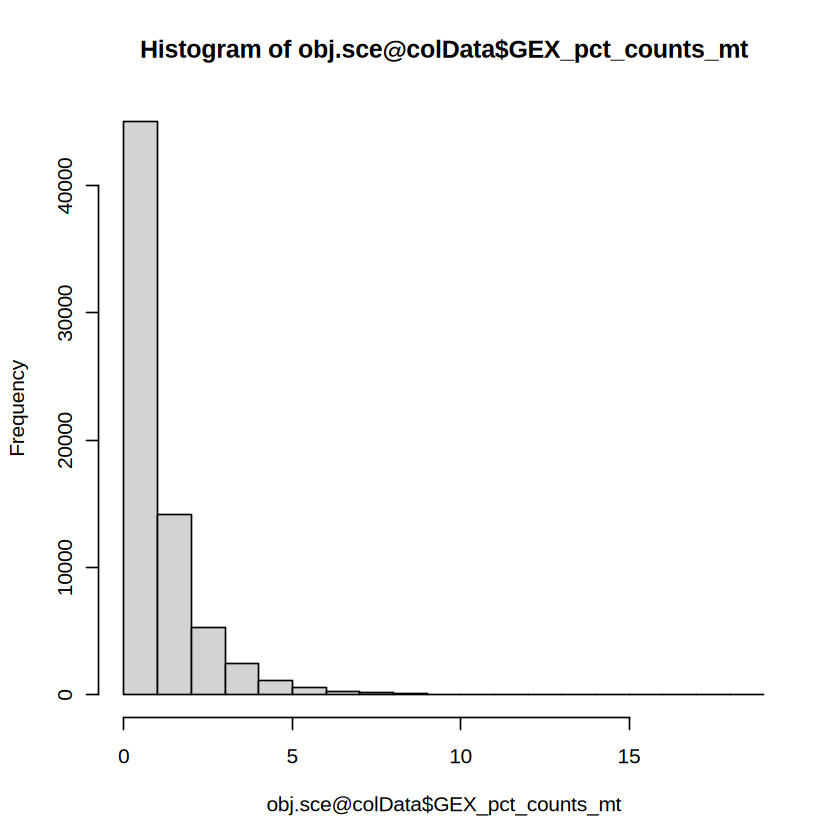

In [9]:
hist(obj.sce@colData$GEX_pct_counts_mt)

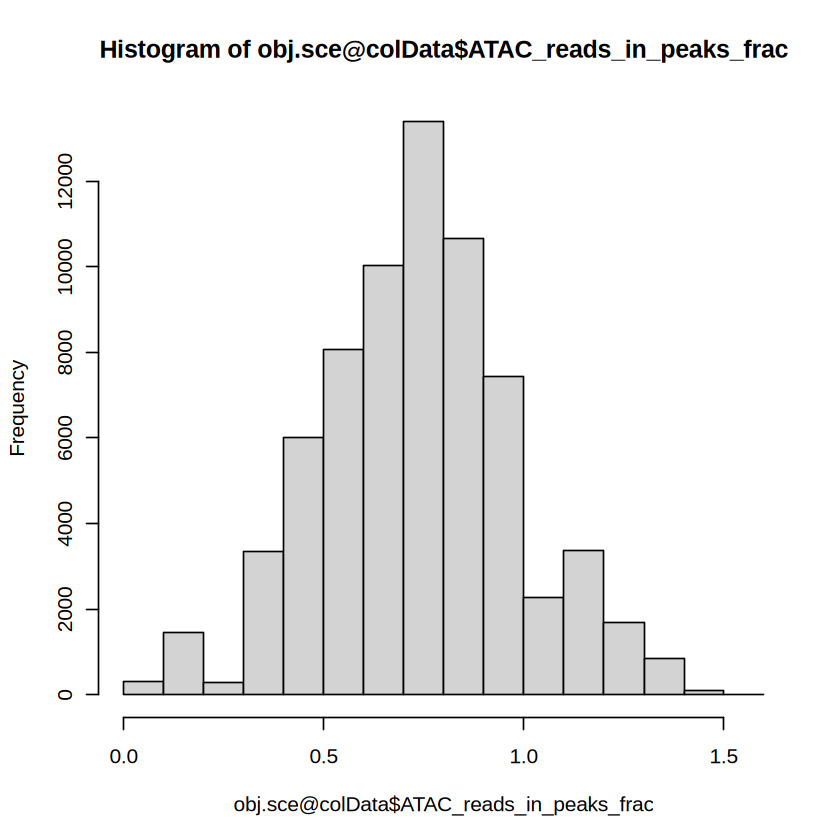

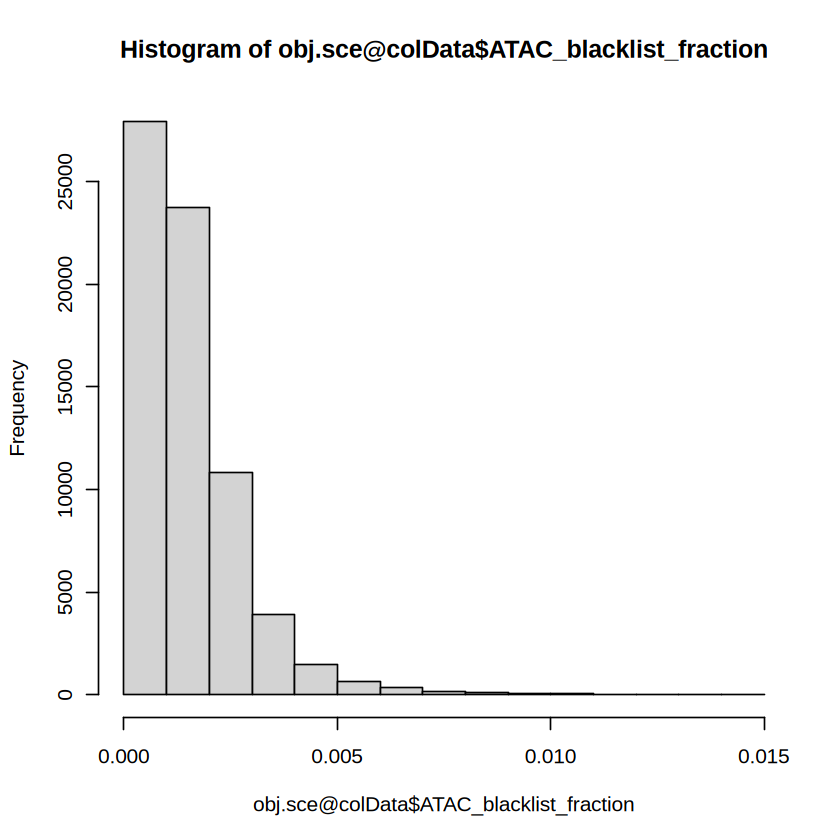

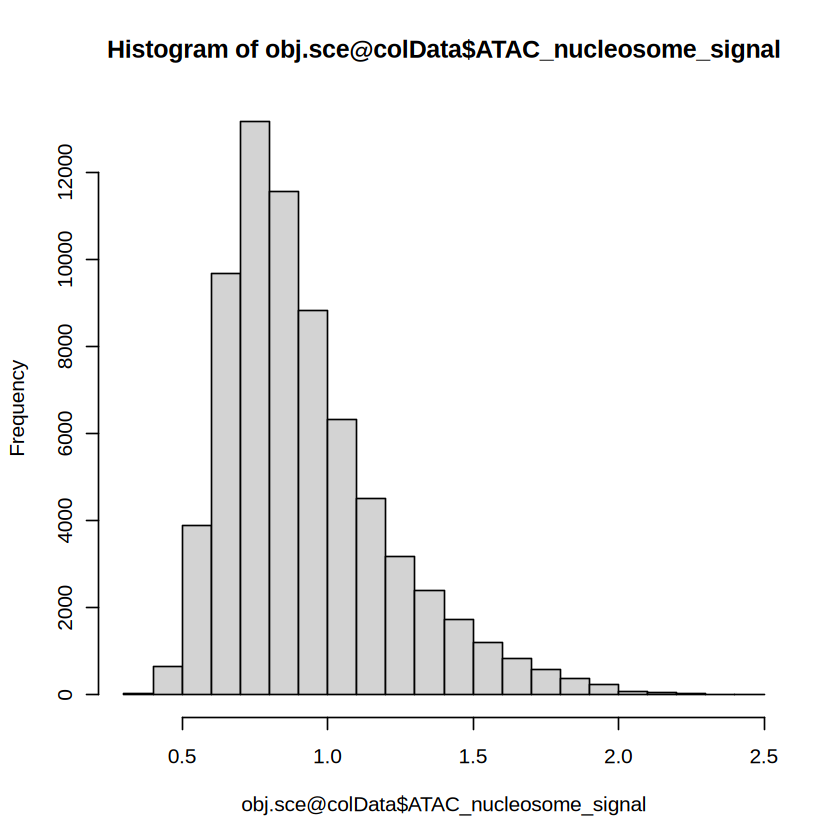

In [10]:
hist(obj.sce@colData$ATAC_reads_in_peaks_frac)
hist(obj.sce@colData$ATAC_blacklist_fraction)
hist(obj.sce@colData$ATAC_nucleosome_signal)

In [11]:
sort(table(obj.sce@colData$batch),
     decreasing = T)
sort(table(obj.sce@colData$cell_type),
     decreasing = T)
sort(table(obj.sce@colData$GEX_phase),
     decreasing = T)


 s4d8  s4d1 s3d10  s1d2  s1d1  s2d4  s2d5  s3d3  s4d9  s1d3  s2d1  s3d7  s3d6 
 9876  8023  6781  6740  6224  6111  4895  4325  4325  4279  4220  1771  1679 


             CD8+ T          CD14+ Mono                  NK    CD4+ T activated 
              11589               10843                6929                5526 
      Naive CD20+ B        Erythroblast        CD4+ T naive      Transitional B 
               5052                4916                4398                2810 
    Proerythroblast          CD16+ Mono                B1 B          Normoblast 
               2300                1894                1890                1780 
         Lymph prog            G/M prog                 pDC                 HSC 
               1779                1203                1191                1072 
       CD8+ T naive           MK/E prog                cDC2                 ILC 
               1012                 884                 859                 835 
        Plasma cell ID2-hi myeloid prog 
                379                 108 


  G2M     S    G1 
48352 20000   897 

Output metadata

In [12]:
write.csv(as.data.frame(obj.sce@colData),
          "../../../data/BMMC/1.prepare_data/1.extract_metadata_from_h5ad.240506/metadata.h5ad.csv")

In [13]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux 8.9 (Ootpa)

Matrix products: default
BLAS/LAPACK: /maps/projects/ralab/people/lpm537/software/anaconda3/envs/Notebook_E2G_240505/lib/libopenblasp-r0.3.27.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Copenhagen
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] zellkonverter_1.12.1 Signac_1.13.0        Seurat_5.0.3        
[4] SeuratObject_5.0.1   sp_2.1-4            

loaded via a namespace (and not attached):
  